In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data set
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [3]:
# function to calculate cost 
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2*m) * cost
    return total_cost

In [7]:
# compute_gradient function, computes the derivative of the gradient descent algorithm
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w, b (scalar)   : model parameters  
    Returns:
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


In [8]:
#  function to calculate the gradient descent 
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = [] 
    b = b_in
    w = w_in

    for i in range(num_iters):
        # calculate the gradient and update the parameters using the gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # update parameters using gradient descent algorithm 
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000: # prevent resource exhaustion
            J_history.append( cost_function(x, y, w, b))
            p_history.append( [w,b])
    
        #Print cost at every 10 intervals or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db:0.3e}",
                  f"w{w:0.3e}, b:{b:0.5e}")
    return w, b, J_history, p_history #return w and J,w history for graphing
        

In [9]:
# run the functions

# initialize parameters
w_init = 0
b_init = 0
# gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-2
# run gradient descent 
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w6.500e+00, b:4.00000e+00
Iteration  100: Cost 8.68e+01 dj_dw: -2.057e+01, dj_db: -1.111e+01 w1.846e+02, b:1.12410e+02
Iteration  200: Cost 1.10e+01 dj_dw: -1.273e+00, dj_db: 7.015e-01 w1.907e+02, b:1.14646e+02
Iteration  300: Cost 9.48e+00 dj_dw: -6.373e-01, dj_db: 9.896e-01 w1.915e+02, b:1.13710e+02
Iteration  400: Cost 8.19e+00 dj_dw: -5.757e-01, dj_db: 9.303e-01 w1.921e+02, b:1.12748e+02
Iteration  500: Cost 7.08e+00 dj_dw: -5.347e-01, dj_db: 8.651e-01 w1.927e+02, b:1.11851e+02
Iteration  600: Cost 6.12e+00 dj_dw: -4.971e-01, dj_db: 8.043e-01 w1.932e+02, b:1.11017e+02
Iteration  700: Cost 5.29e+00 dj_dw: -4.621e-01, dj_db: 7.477e-01 w1.937e+02, b:1.10242e+02
Iteration  800: Cost 4.57e+00 dj_dw: -4.296e-01, dj_db: 6.950e-01 w1.941e+02, b:1.09521e+02
Iteration  900: Cost 3.95e+00 dj_dw: -3.993e-01, dj_db: 6.461e-01 w1.945e+02, b:1.08851e+02
(w,b) found by gradient descent: (194.9111,108.2340)


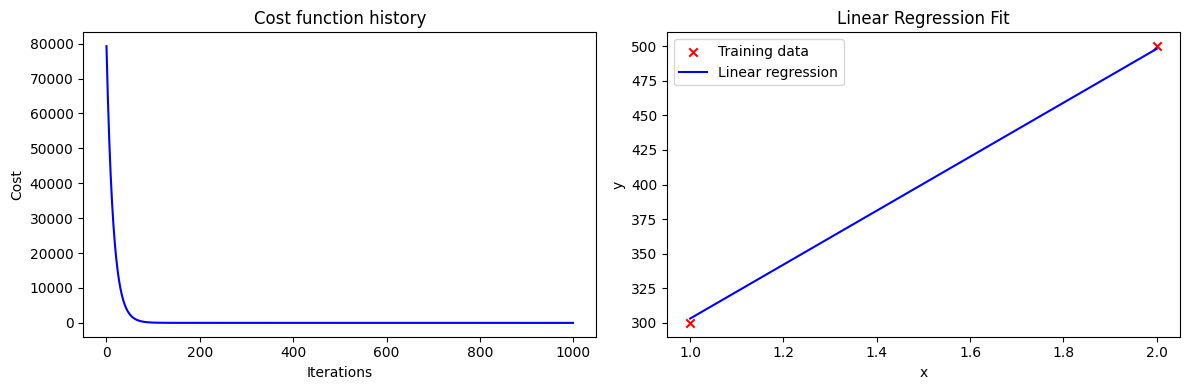

In [10]:
# Plot the cost function history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(iterations), J_hist, 'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function history')

# Plot the data points and the linear regression line
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, color='red', marker='x', label='Training data')
plt.plot(x_train, w_final * x_train + b_final, label='Linear regression', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

plt.tight_layout()
plt.show()